In [ ]:
#ALI JAWED DELAWARI GH1024093


In [3]:
import pandas as pd

# If the file is more like a CSV despite its name, load as CSV:
file_path = 'DirectMarketing.csv.xls'  # Adjust path if needed
df = pd.read_csv(file_path)

# Show the first 5 rows
print(df.head())

# Show basic info
print(df.info())


      Age  Gender OwnHome  Married Location  Salary  Children History  \
0     Old  Female     Own   Single      Far   47500         0    High   
1  Middle    Male    Rent   Single    Close   63600         0    High   
2   Young  Female    Rent   Single    Close   13500         0     Low   
3  Middle    Male     Own  Married    Close   85600         1    High   
4  Middle  Female     Own   Single    Close   68400         0    High   

   Catalogs  AmountSpent  
0         6          755  
1         6         1318  
2        18          296  
3        18         2436  
4        12         1304  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   S

In [29]:
#Load and Inspect Dataset

import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("DirectMarketing.csv.xls")

# Basic structure
print("Shape of the dataset:", df.shape)
print("\nData types and non-null count:\n")
print(df.info())

# First 5 rows
df.head()


Shape of the dataset: (1000, 10)

Data types and non-null count:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      697 non-null    object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.3+ KB
None


,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [5]:
# Count missing values
print("\nMissing values per column:\n")
print(df.isnull().sum())



Missing values per column:

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64


In [7]:
# Fill missing values in 'History' with 'Unknown'
df['History'] = df['History'].fillna('Unknown')


In [8]:
# Summary of numeric columns
df.describe()

# Categorical column summaries
for col in ['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'History']:
    print(f"\nValue counts for {col}:\n")
    print(df[col].value_counts())



Value counts for Age:

Age
Middle    508
Young     287
Old       205
Name: count, dtype: int64

Value counts for Gender:

Gender
Female    506
Male      494
Name: count, dtype: int64

Value counts for OwnHome:

OwnHome
Own     516
Rent    484
Name: count, dtype: int64

Value counts for Married:

Married
Married    502
Single     498
Name: count, dtype: int64

Value counts for Location:

Location
Close    710
Far      290
Name: count, dtype: int64

Value counts for History:

History
Unknown    303
High       255
Low        230
Medium     212
Name: count, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


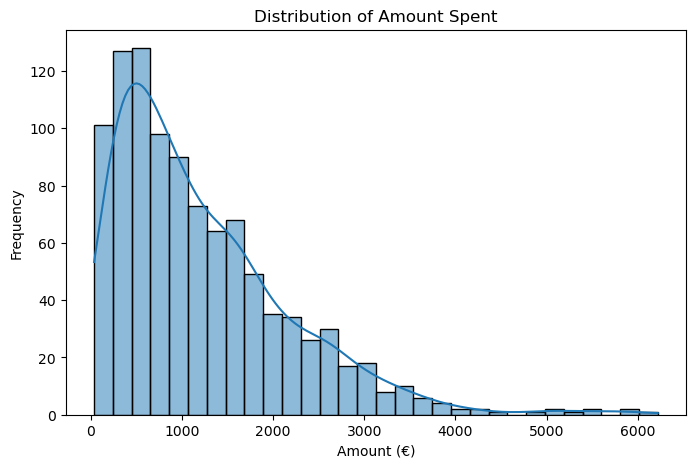

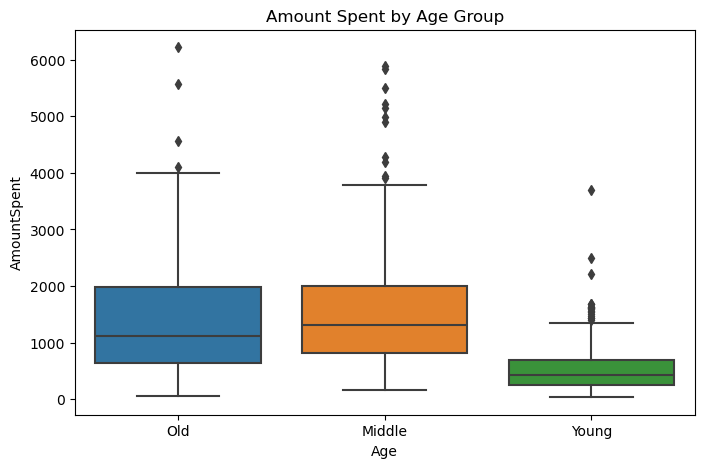

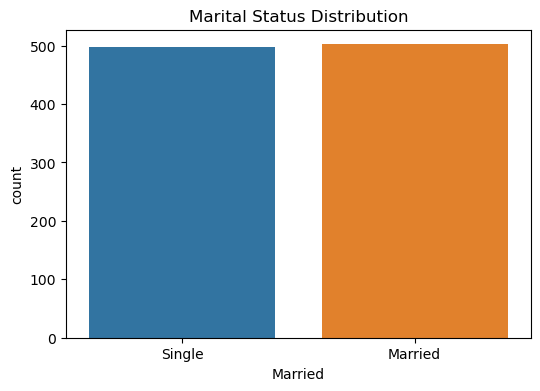

In [9]:
# Distribution of Amount Spent
plt.figure(figsize=(8, 5))
sns.histplot(df['AmountSpent'], bins=30, kde=True)
plt.title("Distribution of Amount Spent")
plt.xlabel("Amount (€)")
plt.ylabel("Frequency")
plt.show()

# Age vs. AmountSpent
plt.figure(figsize=(8, 5))
sns.boxplot(x='Age', y='AmountSpent', data=df)
plt.title("Amount Spent by Age Group")
plt.show()

# Count of Married vs Single
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Married')
plt.title("Marital Status Distribution")
plt.show()


In [ ]:
#Feature Engineering

In [19]:
# One-hot encoding for all categorical variables
#We'll use pd.get_dummies() to convert categorical columns like 'Age', 'Gender', etc., into numeric dummy variables.

categorical_cols = ['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'History']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()


,Salary,Children,Catalogs,AmountSpent,Age_Old,Age_Young,Gender_Male,OwnHome_Rent,Married_Single,Location_Far,History_Low,History_Medium,History_Unknown
0,47500,0,6,755,True,False,False,False,True,True,False,False,False
1,63600,0,6,1318,False,False,True,True,True,False,False,False,False
2,13500,0,18,296,False,True,False,True,True,False,True,False,False
3,85600,1,18,2436,False,False,True,False,False,False,False,False,False
4,68400,0,12,1304,False,False,False,False,True,False,False,False,False


In [20]:
#We’ll scale numeric values (like Salary and AmountSpent) to bring them onto the same range—especially useful for clustering and some models.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = ['Salary', 'Children', 'Catalogs', 'AmountSpent']

df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])
df_encoded.head()


,Salary,Children,Catalogs,AmountSpent,Age_Old,Age_Young,Gender_Male,OwnHome_Rent,Married_Single,Location_Far,History_Low,History_Medium,History_Unknown
0,0.235665,0.000000,0.000000,0.116038,True,False,False,False,True,True,False,False,False
1,0.337114,0.000000,0.000000,0.207153,False,False,True,True,True,False,False,False,False
2,0.021424,0.000000,0.666667,0.041754,False,True,False,True,True,False,True,False,False
3,0.475740,0.333333,0.666667,0.388089,False,False,True,False,False,False,False,False,False
4,0.367360,0.000000,0.333333,0.204888,False,False,False,False,True,False,False,False,False


In [21]:
# Original Salary is still in df
df['HighIncome'] = df['Salary'].apply(lambda x: 1 if x > df['Salary'].median() else 0)


In [22]:
df_encoded['HighIncome'] = df['HighIncome']



In [ ]:
#Modeling & Analysis

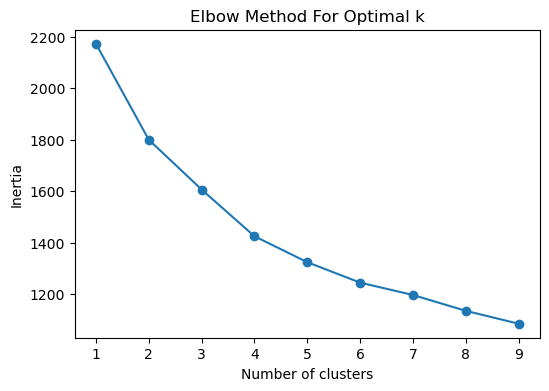

In [26]:
# KMeans Clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method to find optimal k
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Fix added here
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot elbow
plt.figure(figsize=(6, 4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()


In [25]:
#Fit KMeans & Add Cluster Labels
# Let's choose k=4 as an example (based on elbow plot)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_encoded['Cluster'] = kmeans.fit_predict(X_cluster)


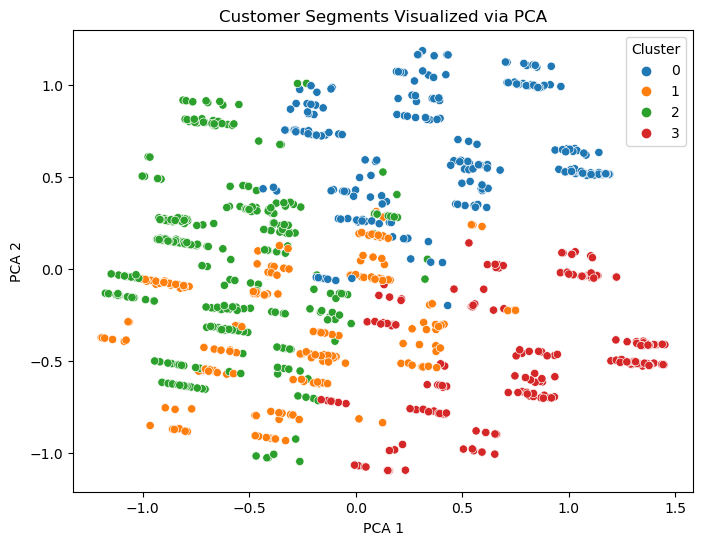

In [23]:
# Visualize Clusters 
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_encoded['Cluster'], palette='tab10')
plt.title("Customer Segments Visualized via PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [ ]:
#Regression (Spending Prediction)

In [27]:
#Train/Test Split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Features and target
X = df_encoded.drop('AmountSpent', axis=1)
y = df_encoded['AmountSpent']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
#Train and Evaluate Models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} — RMSE: {rmse:.4f}, MAE: {mae:.4f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Linear Regression — RMSE: 0.0674, MAE: 0.0533
Random Forest — RMSE: 0.0612, MAE: 0.0420


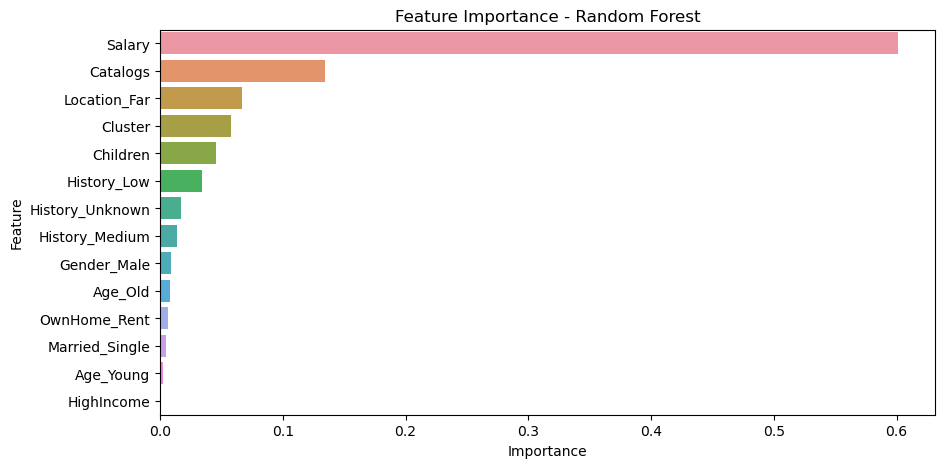

In [29]:
#Feature Importance (for Random Forest)

importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance - Random Forest")
plt.show()


In [ ]:
# Evaluation

In [31]:
#Regression Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Example from Step 4 (if needed again)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest - RMSE:", rmse_rf)
print("Random Forest - MAE:", mae_rf)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression - RMSE:", rmse_lr)
print("Linear Regression - MAE:", mae_lr)


Random Forest - RMSE: 0.06122129614383572
Random Forest - MAE: 0.042010136618654596
Linear Regression - RMSE: 0.0673977413747971
Linear Regression - MAE: 0.05325355095201612


In [32]:
#Clustering Metric

kmeans.inertia_  # Lower = tighter clusters


1176.7905698979537

In [28]:

# Create the table as a DataFrame
model_eval = pd.DataFrame({
    'Model / Metric': ['Linear Regression', 'Random Forest Regression', 'KMeans Clustering (k=4)'],
    'RMSE': [0.0674, 0.0612, 1176.79],
    'MAE': [0.0533, 0.0420, None],
    'Notes': [
        'Decent baseline, assumes linear relationships',
        'Best performing, captures non-linear patterns',
        'Inertia score used for segment compactness'
    ]
})

# Display the table
model_eval


,Model / Metric,RMSE,MAE,Notes
0,Linear Regression,0.0674,0.0533,"Decent baseline, assumes linear relationships"
1,Random Forest Regression,0.0612,0.0420,"Best performing, captures non-linear patterns"
2,KMeans Clustering (k=4),1176.7900,NaN,Inertia score used for segment compactness
